In [46]:
import pandas as pd
data = pd.read_csv('../environnement_data/gdp.csv', index_col=[0])

In [47]:

keep = [
 're_arabic_world',
 're_balkans',
 're_british_islands',
 're_central_europe',
 're_chinese_world',
 're_eastern_europe',
 're_france',
 're_german_world',
 're_greek_world',
 're_indian_world',
 're_italy',
 're_japan',
 're_korea',
 're_latin',
 're_low_countries',
 're_muslim_world',
 're_nordic_countries',
 're_ottoman_turkey',
 're_persian_world',
 're_portugal',
 're_southwestern_europe',
 're_spain',
 're_united_kingdom',
 're_western_europe']

data = data[data['region_code'].isin(keep)]
data = data[data['year']<=1800]
data = data[data['year']>=-800]

In [48]:


keep = [
 're_arabic_world',
 #'re_balkans',
 're_british_islands',
 #'re_central_europe',
 're_chinese_world',
 're_eastern_europe',
 're_france',
 're_german_world',
 #'re_greek_world',
 're_indian_world',
 're_italy',
 're_japan',
 're_korea',
 #'re_latin',
 're_low_countries',
 're_muslim_world',
 're_nordic_countries',
 're_ottoman_turkey',
 're_persian_world',
 're_portugal',
 're_southwestern_europe',
 're_spain',
 're_united_kingdom',
 're_western_europe']

data = data[data['region_code'].isin(keep)]
data = data[data['year']<=1800]
data = data[data['year']>=-800]


df_region = pd.read_csv('../environnement_data/region_code_region_name.csv')
df = pd.merge(data, df_region, on = 'region_code')


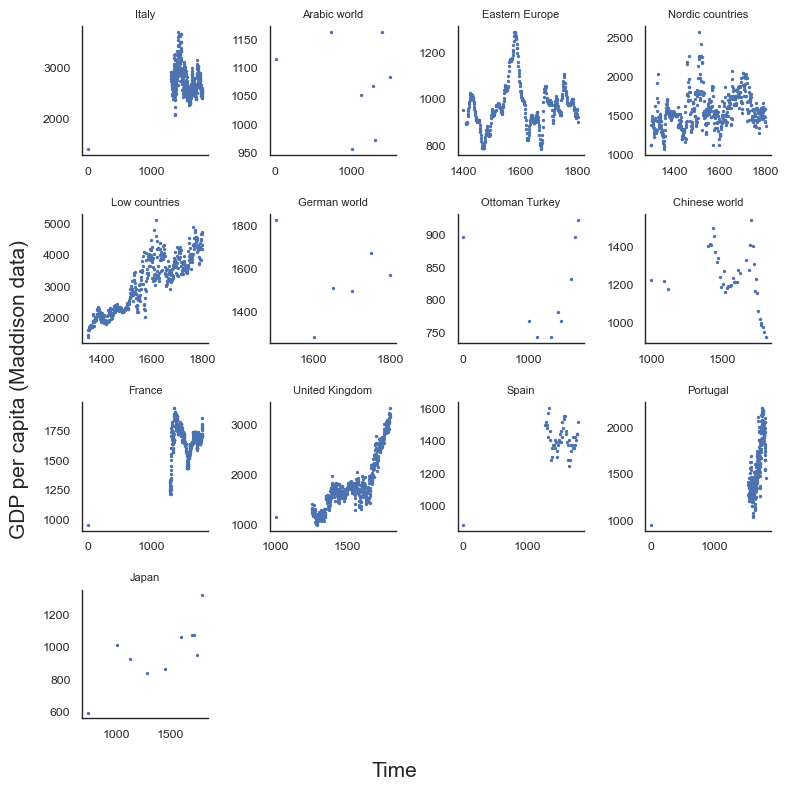

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Set the style and context for the plot
sns.set(style="white")
#sns.set(style="whitegrid")  # Add light grid lines

sns.set_context("paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Create a facet plot with one plot per region and five graphs in one line
g = sns.FacetGrid(df, col="region_name", col_wrap=4, height=2, sharex=False, sharey=False)
g = g.map(plt.scatter, "year", "gdp_per_capita", color='b', linewidth=1, s = 2)

g.set_titles("{col_name}", size=13)
g.set_axis_labels(y_var="", x_var="")

g.fig.supylabel("GDP per capita (Maddison data)", size = 15)
g.fig.supxlabel("Time", size = 15)

plt.tight_layout()
g.set_titles("{col_name}")

# Save the figure
plt.savefig("figures/environment/gdp_per_capita_in_time_per_region.png", dpi=300)

# Show the plot
#plt.show()


In [50]:
df[df['region_name']=='Chinese world'].to_clipboard()